# Сферичні гармоніки та p-орбіталі в квантовій хімії

## 1. Оператор квадрата орбітального моменту імпульсу

У сферичних координатах $(r,\theta,\phi)$:
$$
\boxed{\,
\hat{\mathbf L}^2 \;=\; -\hbar^2\!\left[
\frac{1}{\sin\theta}\frac{\partial}{\partial\theta}\Big(\sin\theta\frac{\partial}{\partial\theta}\Big)
+\frac{1}{\sin^2\theta}\frac{\partial^2}{\partial\phi^2}
\right]\,}
$$

Розв’язуємо задачу на власні значення на сфері:
$$
\hat{\mathbf L}^2 Y(\theta,\phi)=\lambda\, Y(\theta,\phi).
$$

---

## 2. Розділення змінних

Нехай $Y(\theta,\phi)=\Theta(\theta)\Phi(\phi)$. Тоді
$$
-\hbar^2\left[
\frac{1}{\Theta\sin\theta}\frac{d}{d\theta}\!\Big(\sin\theta\frac{d\Theta}{d\theta}\Big)
+\frac{1}{\Phi\sin^2\theta}\frac{d^2\Phi}{d\phi^2}
\right]=\lambda.
$$

Частина, що залежить від $\phi$, дорівнює константі $-\hbar^2 m^2$, звідки
$$
\frac{d^2\Phi}{d\phi^2} + m^2 \Phi = 0 \quad\Rightarrow\quad \Phi(\phi)=\frac{1}{\sqrt{2\pi}} e^{i m\phi},
$$
і умова однозначності вимагає $m\in\mathbb Z$.

Решта дає рівняння для $\Theta(\theta)$:
$$
\frac{1}{\sin\theta}\frac{d}{d\theta}\!\Big(\sin\theta\frac{d\Theta}{d\theta}\Big)
-\frac{m^2}{\sin^2\theta}\Theta + \frac{\lambda}{\hbar^2}\Theta=0.
$$

Позначивши $\lambda=\hbar^2 l(l+1)$, отримаємо
$$
\boxed{\;
\frac{1}{\sin\theta}\frac{d}{d\theta}\!\Big(\sin\theta\frac{d\Theta}{d\theta}\Big)
+\Big[l(l+1)-\frac{m^2}{\sin^2\theta}\Big]\Theta=0\;}.
$$

---

## 3. Перехід до змінної $x=\cos\theta$ та рівняння Лежандра

Нехай $x=\cos\theta$. Тоді
$$
\frac{d}{d\theta} = -\sin\theta\frac{d}{dx},\qquad
\frac{1}{\sin\theta}\frac{d}{d\theta}\!\Big(\sin\theta\frac{d}{d\theta}\Big)
= \frac{d}{dx}\!\Big[(1-x^2)\frac{d}{dx}\Big].
$$

Отримаємо асоційоване рівняння Лежандра:
$$
\boxed{\;
\frac{d}{dx}\!\Big[(1-x^2)\frac{dP}{dx}\Big] + \Big[l(l+1)-\frac{m^2}{1-x^2}\Big]P=0,\quad x\in[-1,1]\;},
$$
де $P(x)=\Theta(\arccos x)$.

Регулярні на $[-1,1]$ розв’язки — асоційовані многочлени Лежандра $P_l^{\,m}(x)$.

---

## 4. Вираз $P_l^{\,m}$ через похідні $P_l$

Для $m\ge0$:
$$
\boxed{\;P_l^{\,m}(x)=(-1)^m (1-x^2)^{m/2}\frac{d^m}{dx^m}P_l(x)\;},
$$
де $P_l(x)$ — звичайний многочлен Лежандра степеня $l$. Для від’ємних $m$:
$$
P_l^{-m}(x)=(-1)^m\frac{(l-m)!}{(l+m)!} P_l^{\,m}(x).
$$

---

## 5. Сферичні гармоніки та їх нормування

Визначаємо сферичні гармоніки:
$$
Y_l^m(\theta,\phi)=N_{l m}\, P_l^{\,m}(\cos\theta)\, e^{i m\phi}.
$$

Вимагаємо ортонормування на сфері:
$$
\int_{0}^{2\pi}\!\int_{0}^{\pi} Y_l^m(\theta,\phi)^* Y_{l'}^{m'}(\theta,\phi)\,\sin\theta\,d\theta\,d\phi
=\delta_{l l'}\delta_{m m'}.
$$

Стандартний вибір (фаза Кондона–Шортлі):
$$
\boxed{\,N_{l m}=(-1)^m\sqrt{\frac{2l+1}{4\pi}\,\frac{(l-m)!}{(l+m)!}}\, }.
$$

Отже:
$$
\boxed{\,Y_l^m(\theta,\phi)=(-1)^m\sqrt{\frac{2l+1}{4\pi}\frac{(l-m)!}{(l+m)!}}\, P_l^{\,m}(\cos\theta)\, e^{i m\phi}\,}.
$$

Вони задовольняють:
$$
\hat{\mathbf L}^2 Y_l^m = \hbar^2 l(l+1) Y_l^m,\qquad \hat L_z Y_l^m = \hbar m\, Y_l^m.
$$

---

## 6. Частковий випадок $l=1$ — p-орбіталі

Асоційовані многочлени для $l=1$:
$$
P_1(x)=x,\qquad P_1^0(x)=x,\qquad P_1^{1}(x)=-\sqrt{1-x^2}.
$$

Нормувальні множники:
$$
N_{1,0}=\sqrt{\frac{3}{4\pi}},\qquad N_{1,\pm1}=\mp\sqrt{\frac{3}{8\pi}}.
$$

Отже:
$$
Y_1^{0}(\theta,\phi)=\sqrt{\frac{3}{4\pi}}\cos\theta,
$$
$$
Y_1^{\pm1}(\theta,\phi)=\mp\sqrt{\frac{3}{8\pi}}\sin\theta\, e^{\pm i\phi}.
$$

Реальні комбінації (p-орбіталі):
$$
p_x=\frac{1}{\sqrt2}\big(Y_1^{-1}-Y_1^{1}\big)=\sqrt{\frac{3}{4\pi}}\sin\theta\cos\phi,
$$
$$
p_y=\frac{i}{\sqrt2}\big(Y_1^{-1}+Y_1^{1}\big)=\sqrt{\frac{3}{4\pi}}\sin\theta\sin\phi,
$$
$$
p_z=Y_1^0=\sqrt{\frac{3}{4\pi}}\cos\theta.
$$

---

## 7. Інтеграл нормування (загальна перевірка)

Для перевірки нормування $N_{lm}$ використовуємо:
$$
\int_0^{2\pi}\!\int_0^\pi |Y_l^m|^2 \sin\theta\,d\theta d\phi
=|N_{lm}|^2 \cdot 2\pi \int_{-1}^{1} \big[P_l^{\,m}(x)\big]^2 dx = 1.
$$

Відомо:
$$
\int_{-1}^{1} \big[P_l^{\,m}(x)\big]^2 dx = \frac{2}{2l+1}\frac{(l+m)!}{(l-m)!},
$$
звідки і випливає наведений $N_{lm}$.

У квантовій механіці хвильова функція атомних орбіталей для воднеподібних атомів описується за допомогою **сферичних гармонік** $Y_l^m(\theta, \phi)$, які є частиною кутової залежності. Радіальна частина задається функцією $R_{n l}(r)$, але в цьому прикладі ми фокусуємося на кутовій частині для p-орбіталей ($l = 1$).

Сферичні гармоніки для $l = 1$ та магнітних квантових чисел $m = -1, 0, +1$ визначаються як:

$$
Y_{1}^{-1}(\theta, \phi) = \sqrt{\frac{3}{8\pi}} \sin\theta \, e^{i\phi}
$$

$$
Y_{1}^{0}(\theta, \phi) = \sqrt{\frac{3}{4\pi}} \cos\theta
$$

$$
Y_{1}^{1}(\theta, \phi) = -\sqrt{\frac{3}{8\pi}} \sin\theta \, e^{-i\phi}
$$

(Зверніть увагу, що в коді використовуються нормалізовані форми з `sympy`, які можуть відрізнятися знаком або множником, але еквівалентні.)

Реальні p-орбіталі ($p_x$, $p_y$, $p_z$) є лінійними комбінаціями комплексних сферичних гармонік для зручності в хімії та візуалізації:

$$
p_x = \frac{1}{\sqrt{2}} \left( Y_{1}^{-1} - Y_{1}^{1} \right)
$$

$$
p_y = \frac{i}{\sqrt{2}} \left( Y_{1}^{-1} + Y_{1}^{1} \right)
$$

$$
p_z = Y_{1}^{0}
$$

Після спрощення з використанням тригонометричних тотожностей (наприклад, $e^{i\phi} + e^{-i\phi} = 2\cos\phi$), отримуємо реальні функції:

$$
p_x(\theta, \phi) = \sqrt{\frac{3}{4\pi}} \sin\theta \cos\phi
$$

$$
p_y(\theta, \phi) = \sqrt{\frac{3}{4\pi}} \sin\theta \sin\phi
$$

$$
p_z(\theta, \phi) = \sqrt{\frac{3}{4\pi}} \cos\theta
$$

Ці функції візуалізуються в сферичних координатах, де радіус пропорційний $|p(\theta, \phi)|$, а колір вказує на знак (червоний для додатного, синій для від’ємного). Перетворення до декартових координат:

$$
x = |p| \sin\theta \cos\phi, \quad y = |p| \sin\theta \sin\phi, \quad z = |p| \cos\theta
$$

Графік показує форму гантелі, характерну для p-орбіталей. Повна хвильова функція для 2p-орбіталі включає радіальну частину $R_{nl}(r)$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sympy import *
from sympy.abc import Z, phi, r, theta
from sympy.physics.hydrogen import R_nl, Ynm

In [48]:
Ynm(0, 0, theta, phi).expand(func=True)

1/(2*sqrt(pi))

In [28]:
A = Ynm(1, -1, theta, phi).expand(func=True) - Ynm(1, +1, theta, phi).expand(func=True)
A

sqrt(6)*exp(I*phi)*sin(theta)/(4*sqrt(pi)) + sqrt(6)*exp(-I*phi)*sin(theta)/(4*sqrt(pi))

In [29]:
simplify(A)

sqrt(6)*sin(theta)*cos(phi)/(2*sqrt(pi))

In [27]:
Ynm(1, 0, theta, phi).expand(func=True)

sqrt(3)*cos(theta)/(2*sqrt(pi))

In [31]:
px = ( 1 / sqrt(2) * ( Ynm(1, -1, theta, phi).expand(func=True) - Ynm(1, +1, theta, phi).expand(func=True) ) )
py = ( I / sqrt(2) * ( Ynm(1, -1, theta, phi).expand(func=True) + Ynm(1, +1, theta, phi).expand(func=True) ) )
pz = Ynm(1, 0, theta, phi).expand(func=True)


In [34]:
simplify(px)

sqrt(3)*sin(theta)*cos(phi)/(2*sqrt(pi))

In [35]:
simplify(py)

sqrt(3)*sin(phi)*sin(theta)/(2*sqrt(pi))

In [36]:
simplify(pz)

sqrt(3)*cos(theta)/(2*sqrt(pi))

In [37]:
x, y, z, r = symbols("x y z r")

In [38]:
px = trigsimp(px).subs(exp(I * phi) + exp(-I * phi), 2 * cos(phi))
px

sqrt(3)*sin(theta)*cos(phi)/(2*sqrt(pi))

In [39]:
py = trigsimp(py).subs(exp(I * phi) - exp(-I * phi), 2 * I * sin(phi))
py

sqrt(3)*sin(phi)*sin(theta)/(2*sqrt(pi))

In [40]:
theta_vals = np.linspace(0, np.pi, 50)
phi_vals = np.linspace(0, 2 * np.pi, 50)
Theta, Phi = np.meshgrid(theta_vals, phi_vals)

In [41]:
px_func = lambdify((theta, phi), px, "numpy")
py_func = lambdify((theta, phi), py, "numpy")
pz_func = lambdify((theta, phi), pz, "numpy")
px_func_vals = px_func(Theta, Phi)
py_func_vals = py_func(Theta, Phi)
pz_func_vals = pz_func(Theta, Phi)

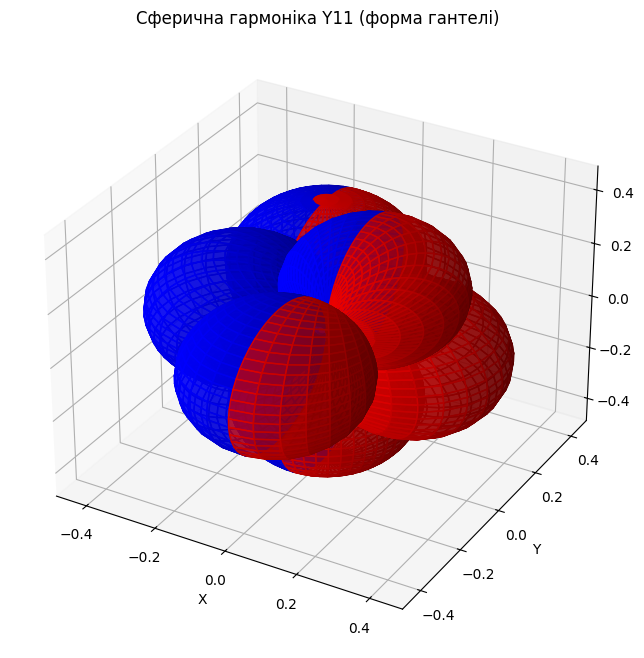

In [46]:
# Перетворюємо в декартові координати
# Радіус = абсолютне значення функції

PxX = np.abs(px_func_vals) * np.sin(Theta) * np.cos(Phi)
PxY = np.abs(px_func_vals) * np.sin(Theta) * np.sin(Phi)
PxZ = np.abs(px_func_vals) * np.cos(Theta)

PyX = np.abs(py_func_vals) * np.sin(Theta) * np.cos(Phi)
PyY = np.abs(py_func_vals) * np.sin(Theta) * np.sin(Phi)
PyZ = np.abs(py_func_vals) * np.cos(Theta)

PzX = np.abs(pz_func_vals) * np.sin(Theta) * np.cos(Phi)
PzY = np.abs(pz_func_vals) * np.sin(Theta) * np.sin(Phi)
PzZ = np.abs(pz_func_vals) * np.cos(Theta)

# Створюємо графік
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# Колір залежить від знака функції (+ червоний, - синій)
colors = np.where(px_func_vals >= 0, "red", "blue")
# ax.plot_surface(PxX, PxY, PxZ, facecolors=colors, alpha=0.7)
# ax.plot_surface(PyX, PyY, PyZ, facecolors=colors, alpha=0.7)
ax.plot_surface(PxX, PxY, PxZ, facecolors=colors, alpha=0.7)
ax.plot_surface(PyX, PyY, PyZ, facecolors=colors, alpha=0.7)
ax.plot_surface(PzX, PzY, PzZ, facecolors=colors, alpha=0.7)


ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Сферична гармоніка Y11 (форма гантелі)")

# Однакові масштаби по всіх осях
max_range = np.max([PxX.max(), PyY.max(), PzZ.max()])
ax.set_xlim([-max_range, max_range])
ax.set_ylim([-max_range, max_range])
ax.set_zlim([-max_range, max_range])

plt.show()